# Plot for different states contribution to national Confirmed Cases

Covid19 Confirmed cases dataset is provided by Covid19india.org. These Indian states are affected of SARS Covid-19 (aka Corona virus) outbreak. The dataset consist of states and latest updated values of Confirmed, Recovered and Deaths.

This script fetches the online datasets and parses through them for the states which contribute to more than or equal to 1% of total cases in India and plots them in line-plot format. Latest cumulative data for those states is also shown.

Datasets can be found here: https://api.covid19india.org/csv/. Their official github page is: https://github.com/covid19india

Note: Whenever States are mentioned kindly assume it also includes the Union Territories as well.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter
import math
import matplotlib.pyplot as plt

### Import and Load Datasets
#### Latest State-wise
In link provided above one can see various datasets in form of comma separated files(csv), we will import Latest data for States:
 *'state_wise.csv'*

In [ ]:
Statedf = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')

In [ ]:
Statedf.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,182990,87099,5188,90692,31/05/2020 15:44:03,TT,1129,163,3,NaN
1,Maharashtra,65168,28081,2197,34890,30/05/2020 21:54:04,MH,0,0,0,NaN
2,Tamil Nadu,21184,12000,163,9021,30/05/2020 19:13:04,TN,0,0,0,2 deaths cross notified to other states from C...
3,Delhi,18549,8075,416,10058,30/05/2020 20:35:04,DL,0,0,0,[10-May]<br>\n\nDelhi bulletins in the morning...
4,Gujarat,16356,9232,1007,6117,30/05/2020 20:14:04,GJ,0,0,0,NaN


Finding the last update done in dataset

In [ ]:
Date = datetime.strptime(Statedf['Last_Updated_Time'][0],'%d/%m/%Y %X').strftime("%d %B %Y")
Date

'31 May 2020'

### Formatting the dataset

We just need the state name and confirmed value from the main dataset. A new column 'percent' is also calculated showing each state's percentage of confirmed cases to total (national level) cases

In [ ]:
RefStatedf = Statedf[['State', 'Confirmed']].copy()

RefStatedf['Percent'] = (RefStatedf['Confirmed']/RefStatedf.iloc[0,1])*100

RefStatedf.drop(RefStatedf[ RefStatedf['State'] == 'State Unassigned' ].index , inplace=True)

RefStatedf.head()

,State,Confirmed,Percent
0,Total,182990,100.000000
1,Maharashtra,65168,35.612875
2,Tamil Nadu,21184,11.576589
3,Delhi,18549,10.136619
4,Gujarat,16356,8.938193


Next we find out those states which contribute 1% or more than 1%. And also combine other states in single row.

In [ ]:
Ninetypcdf = RefStatedf[RefStatedf['Percent'] >= 1]
Ninetypcdf

Ninetypcdf = Ninetypcdf.append({'State' : 'Other States and UTs' , 
                                'Confirmed' : RefStatedf.loc[RefStatedf['Percent'] < 1, 'Confirmed'].sum(), 
                                'Percent' : RefStatedf.loc[RefStatedf['Percent'] < 1,'Percent'].sum()}, ignore_index=True)
Ninetypcdf

,State,Confirmed,Percent
0,Total,182990,100.000000
1,Maharashtra,65168,35.612875
2,Tamil Nadu,21184,11.576589
3,Delhi,18549,10.136619
4,Gujarat,16356,8.938193
5,Rajasthan,8693,4.750533
6,Madhya Pradesh,7891,4.312258
7,Uttar Pradesh,7701,4.208427
8,West Bengal,5130,2.803432
9,Bihar,3676,2.008853


### Finally the plot

Horizontal plot lines are made using the 'hline' function. Also check out the image saved in your system

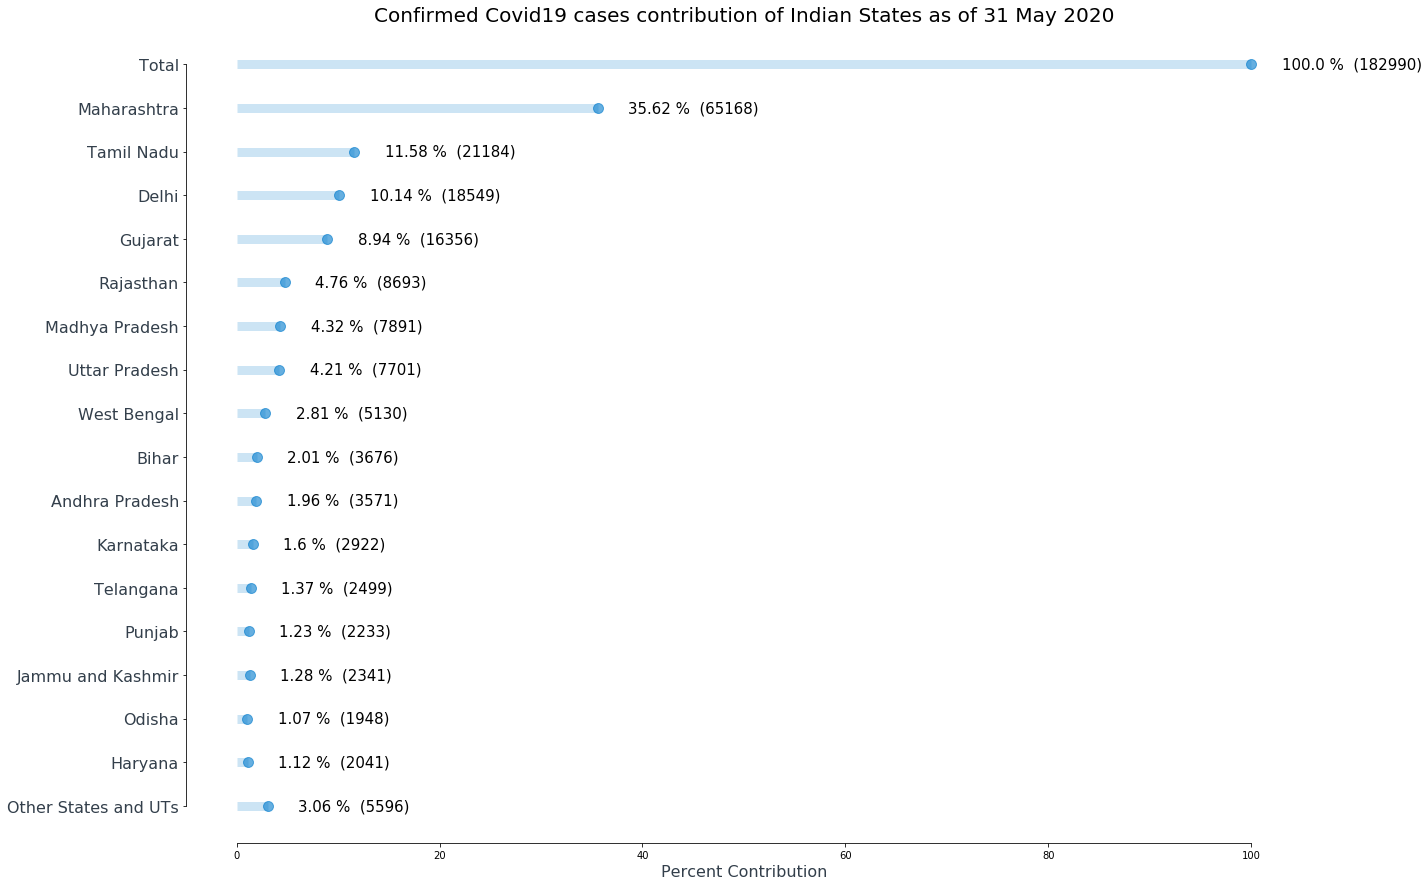

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))

yrange = np.arange(Ninetypcdf.shape[0])

plt.hlines(y = yrange, xmin = 0, xmax = Ninetypcdf['Percent'], color='#007ACC', alpha=0.2, linewidth = 9)

plt.plot(Ninetypcdf['Percent'], yrange, "o", markersize = 10, color='#007ACC', alpha=0.6)

# Loop to print the percentage and values
for i in range(Ninetypcdf.shape[0]):
        PValue = Ninetypcdf.iloc[i][2]
        CValue = Ninetypcdf.iloc[i][1]
        plt.text(PValue+3, i, str(math.ceil(PValue*100)/100) + ' %  (' + str(CValue) + ')', color='black', 
                 fontsize = 15, va = 'center', ha = 'left')

# Plot Formatting

ax.set_title('Confirmed Covid19 cases contribution of Indian States as of ' + Date, 
              fontsize=20)
              
ax.set_xlabel('Percent Contribution', fontsize = 16, color = '#333F4B')
ax.set_ylabel('')
    
ax.set_yticks(yrange)
ax.set_yticklabels(Ninetypcdf['State'], fontsize = 16, color = '#333F4B')
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig('StatePercent.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d20f0b1-a95e-4774-951b-ce52162787ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>